<a href="https://colab.research.google.com/github/adihari2001/srpproject-corona/blob/main/SRPcoronanalysisandforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests # webscrapping worldometer
import pandas as pd 
r=requests.get('https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/')

In [ ]:
import pandas as pd# imporitng libraries
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
soup=BeautifulSoup(r.content,'html5lib')

In [ ]:
data=[]
iterator = iter(soup.find_all('td')) # generating iterator

In [ ]:
while True: 
    try: 
        country = next(iterator).text 
        confirmed = next(iterator).text   # costructing country ,confirmed,deaths columns
        deaths = next(iterator).text 
        continent = next(iterator).text
        data.append(( 
            country, 
            int(confirmed.replace(',', '')), 
            int(deaths.replace(',', '')), 
            continent 
        )) 
  
    
    except StopIteration:  # stopping when no element left to iterate to
        break   
data.sort(key = lambda row: row[1], reverse = True) 

In [ ]:
data[0:50] # web scraped data

[('United States', 10708728, 247398, 'North America'),
 ('India', 8684039, 128165, 'Asia'),
 ('Brazil', 5749007, 163406, 'South America'),
 ('France', 1865538, 42535, 'Europe'),
 ('Russia', 1858568, 32032, 'Europe'),
 ('Spain', 1463093, 40105, 'Europe'),
 ('Argentina', 1273356, 34531, 'South America'),
 ('United Kingdom', 1256725, 50365, 'Europe'),
 ('Colombia', 1165326, 33312, 'South America'),
 ('Italy', 1028424, 42953, 'Europe'),
 ('Mexico', 986177, 96430, 'North America'),
 ('Peru', 928006, 35031, 'South America'),
 ('South Africa', 742394, 20011, 'Africa'),
 ('Germany', 726176, 12082, 'Europe'),
 ('Iran', 715068, 39664, 'Asia'),
 ('Poland', 618813, 8805, 'Europe'),
 ('Chile', 524804, 14633, 'South America'),
 ('Belgium', 515391, 13758, 'Europe'),
 ('Iraq', 508508, 11482, 'Asia'),
 ('Ukraine', 500865, 9145, 'Europe'),
 ('Indonesia', 448118, 14836, 'Asia'),
 ('Czech Republic (Czechia)', 438805, 5570, 'Europe'),
 ('Bangladesh', 425353, 6127, 'Asia'),
 ('Netherlands', 424819, 8215, 'E

In [ ]:
data

[('United States', 10708728, 247398, 'North America'),
 ('India', 8684039, 128165, 'Asia'),
 ('Brazil', 5749007, 163406, 'South America'),
 ('France', 1865538, 42535, 'Europe'),
 ('Russia', 1858568, 32032, 'Europe'),
 ('Spain', 1463093, 40105, 'Europe'),
 ('Argentina', 1273356, 34531, 'South America'),
 ('United Kingdom', 1256725, 50365, 'Europe'),
 ('Colombia', 1165326, 33312, 'South America'),
 ('Italy', 1028424, 42953, 'Europe'),
 ('Mexico', 986177, 96430, 'North America'),
 ('Peru', 928006, 35031, 'South America'),
 ('South Africa', 742394, 20011, 'Africa'),
 ('Germany', 726176, 12082, 'Europe'),
 ('Iran', 715068, 39664, 'Asia'),
 ('Poland', 618813, 8805, 'Europe'),
 ('Chile', 524804, 14633, 'South America'),
 ('Belgium', 515391, 13758, 'Europe'),
 ('Iraq', 508508, 11482, 'Asia'),
 ('Ukraine', 500865, 9145, 'Europe'),
 ('Indonesia', 448118, 14836, 'Asia'),
 ('Czech Republic (Czechia)', 438805, 5570, 'Europe'),
 ('Bangladesh', 425353, 6127, 'Asia'),
 ('Netherlands', 424819, 8215, 'E

In [ ]:
corona = pd.DataFrame(data, columns =['country', 'Active Cases','Deaths', 'Continent']) #convereting data from list of tuples to dataframe

In [ ]:
corona # web scraped data frame 

,country,Active Cases,Deaths,Continent
0,United States,10708728,247398,North America
1,India,8684039,128165,Asia
2,Brazil,5749007,163406,South America
3,France,1865538,42535,Europe
4,Russia,1858568,32032,Europe
...,...,...,...,...
213,MS Zaandam,9,2,
214,Anguilla,3,0,North America
215,Vanuatu,1,0,Australia/Oceania
216,Marshall Islands,1,0,Australia/Oceania


In [ ]:
corona.head()# exploring

,country,Active Cases,Deaths,Continent
0,United States,10708728,247398,North America
1,India,8684039,128165,Asia
2,Brazil,5749007,163406,South America
3,France,1865538,42535,Europe
4,Russia,1858568,32032,Europe


In [ ]:
corona.isnull()# checking for missing values

,country,Active Cases,Deaths,Continent
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
213,False,False,False,False
214,False,False,False,False
215,False,False,False,False
216,False,False,False,False


In [ ]:
corona=corona.dropna(axis=1) 
corona.shape

(218, 4)

In [ ]:
import seaborn as sns #imoprting seaborn 

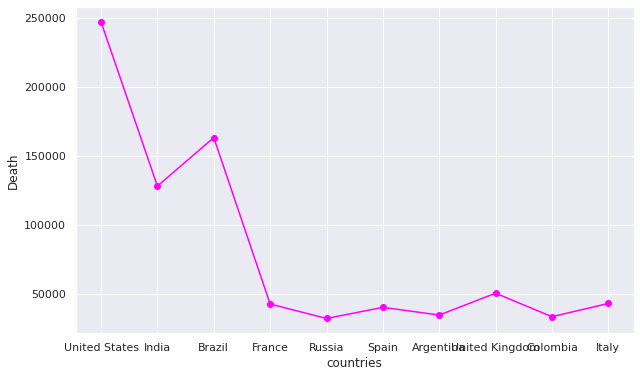

In [ ]:
country_=corona['country']# visualization
plt.plot(country_[0:10],corona.Deaths[0:10],color='magenta',marker='o',)# plot between   top 10 countries and their deaths
plt.xlabel('countries')
plt.ylabel('Death')
plt.rcParams["figure.figsize"] = (15,9)# resizing plot
plt.show()

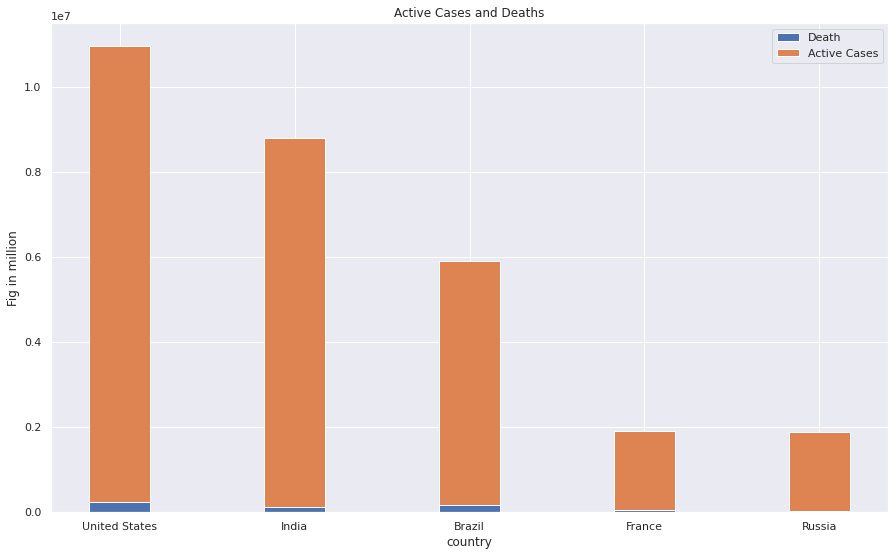

In [ ]:
active=corona['Active Cases']# visuliazation
fig, ax = plt.subplots()
width=0.35
ax.bar(country_[0:5],corona.Deaths[0:5], width, label='Death')
ax.bar(country_[0:5],active[0:5], width, bottom=corona.Deaths[0:5],
       label='Active Cases')# plot between top 5 countries and comparision of their active cases and  deaths

ax.set_xlabel('country')
ax.set_ylabel('Fig in million')
ax.set_title('Active Cases and Deaths')
ax.legend()

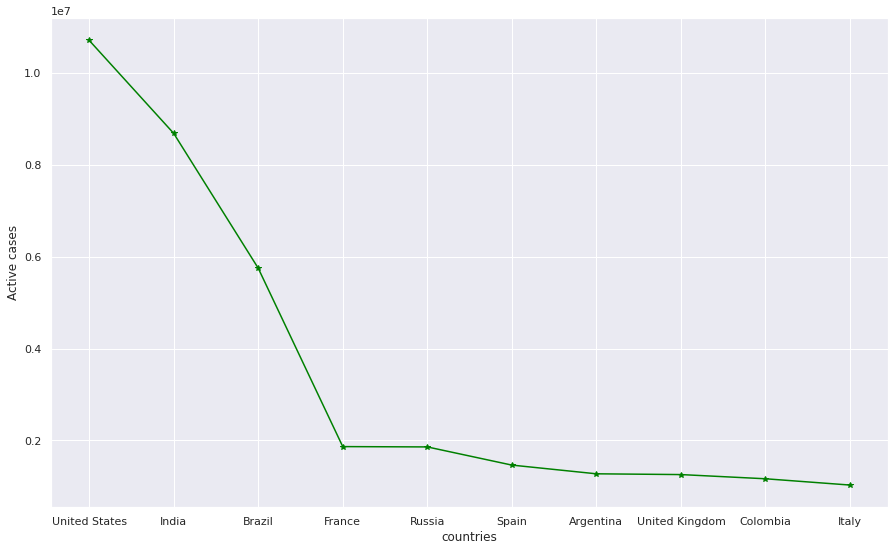

In [ ]:
plt.plot(country_[0:10],active[0:10],color='green',marker='*')# visulaization- plot between top 10 countries  and their active  cases
plt.xlabel('countries')
plt.ylabel('Active cases')
plt.rcParams["figure.figsize"] = (10,9)

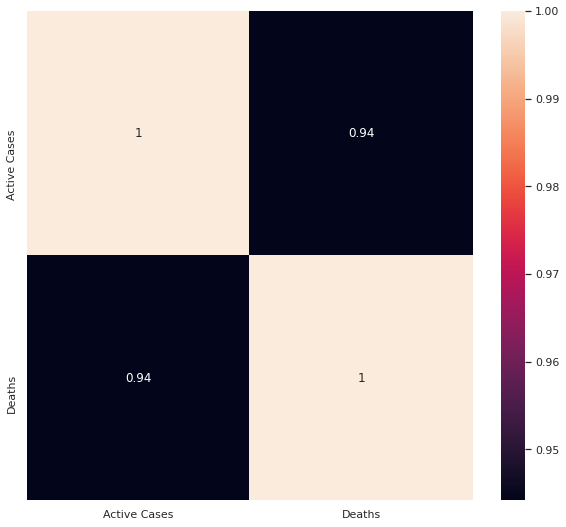

In [ ]:
corr_matrix=corona.corr()
sns.heatmap(corr_matrix, annot=True)# corellation plot to check if their is a relation between active cases and deaths
plt.show()

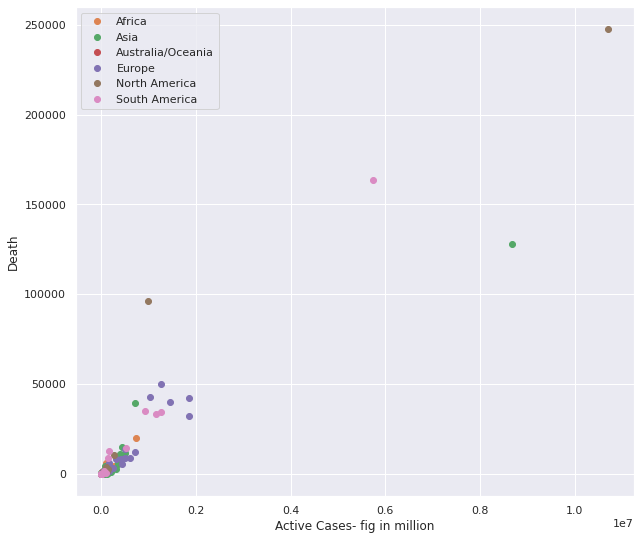

In [ ]:
groups = corona.groupby("Continent")
for ac,de  in groups:     # plot between  cases and deaths  classifing by continent  where each dot represents a country
     plt.plot(de["Active Cases"], de["Deaths"], marker="o", linestyle="", label=ac)
plt.legend()
plt.xlabel('Active Cases- fig in million')
plt.ylabel('Death')  
plt.rcParams["figure.figsize"] = (10,6)   

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



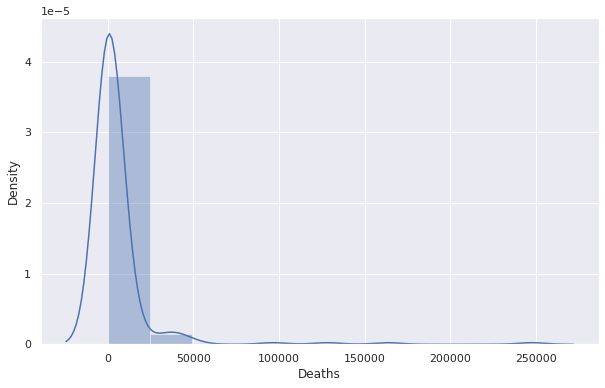

In [ ]:
sns.set(style='darkgrid')
sns.distplot(corona['Deaths'],bins=10,)
# The probabilty density for deaths less than 1000 is very high relative to other deaths numerically


In [ ]:
# forecasting corona spread in the world
forecast=pd.read_csv('/content/drive/My Drive/day_wise.csv')# time seires data set
forecast

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new_data=forecast.reindex(index=forecast.index[::-1])  # re arranging dates
new_data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8


In [ ]:
new_data.isnull().any() # checking for missing vlaues

Date                      False
Confirmed                 False
Deaths                    False
Recovered                 False
Active                    False
New cases                 False
New deaths                False
New recovered             False
Deaths / 100 Cases        False
Recovered / 100 Cases     False
Deaths / 100 Recovered    False
No. of countries          False
dtype: bool

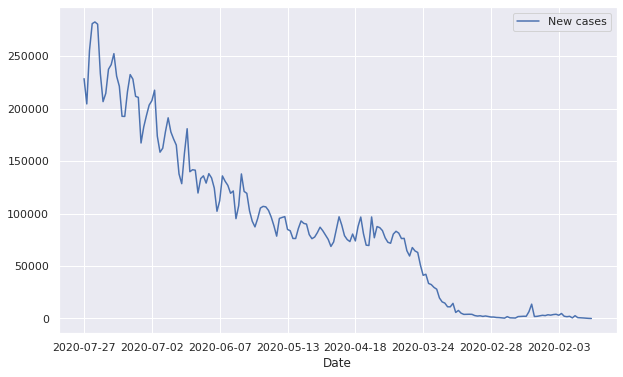

In [ ]:
new_data.plot('Date','New cases') # plotting time series

In [ ]:
new_data=new_data.drop(['Confirmed','Deaths','New deaths','New recovered','Recovered / 100 Cases','Deaths / 100 Recovered','No. of countries'],axis=1) # dropping unessary columns

In [ ]:
new_data

,Date,Recovered,Active,New cases,Deaths / 100 Cases
187,2020-07-27,9468087,6358362,228693,3.97
186,2020-07-26,9293464,6309711,204606,3.99
185,2020-07-25,9158743,6243930,255545,4.02
184,2020-07-24,8939705,6212290,281164,4.05
183,2020-07-23,8710969,6166006,282756,4.08
...,...,...,...,...,...
4,2020-01-26,52,2010,684,2.64
3,2020-01-25,39,1353,493,2.93
2,2020-01-24,36,879,287,2.76
1,2020-01-23,30,606,99,2.75


In [ ]:
new_data=new_data.drop(['Recovered','Active','Deaths / 100 Cases'],axis=1)

In [ ]:
new_data

,Date,New cases
187,2020-07-27,228693
186,2020-07-26,204606
185,2020-07-25,255545
184,2020-07-24,281164
183,2020-07-23,282756
...,...,...
4,2020-01-26,684
3,2020-01-25,493
2,2020-01-24,287
1,2020-01-23,99


In [ ]:
new_data.columns=['ds','y']# renamming according to convention of fbprophet
new_data

,ds,y
187,2020-07-27,228693
186,2020-07-26,204606
185,2020-07-25,255545
184,2020-07-24,281164
183,2020-07-23,282756
...,...,...
4,2020-01-26,684
3,2020-01-25,493
2,2020-01-24,287
1,2020-01-23,99


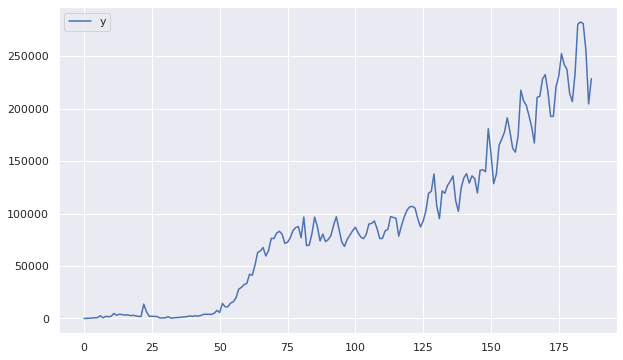

In [ ]:
new_data.plot()# stationary data 

In [ ]:
from fbprophet import  Prophet # imporitng fbprophet

In [ ]:
model=Prophet()
 
model.fit(new_data)  # fitting model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [ ]:
future=model.make_future_dataframe(periods=30) # forecsting for next 100 days

In [ ]:
prediction=model.predict(future) # forecasting 

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5813.139254,-17838.549618,10921.607807,-5813.139254,-5813.139254,3495.360986,3495.360986,3495.360986,3495.360986,3495.360986,3495.360986,0.0,0.0,0.0,-2317.778268
1,2020-01-23,-5461.165735,-12838.589249,16604.768166,-5461.165735,-5461.165735,7665.880754,7665.880754,7665.880754,7665.880754,7665.880754,7665.880754,0.0,0.0,0.0,2204.715019
2,2020-01-24,-5109.192215,-11483.415528,18185.966611,-5109.192215,-5109.192215,8220.906763,8220.906763,8220.906763,8220.906763,8220.906763,8220.906763,0.0,0.0,0.0,3111.714548
3,2020-01-25,-4757.218696,-17163.220349,13021.745946,-4757.218696,-4757.218696,2451.825252,2451.825252,2451.825252,2451.825252,2451.825252,2451.825252,0.0,0.0,0.0,-2305.393444
4,2020-01-26,-4405.245176,-27938.814963,2570.937980,-4405.245176,-4405.245176,-8186.681341,-8186.681341,-8186.681341,-8186.681341,-8186.681341,-8186.681341,0.0,0.0,0.0,-12591.926517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,324304.981990,310437.010777,342408.232660,316492.123099,331107.599214,2451.825252,2451.825252,2451.825252,2451.825252,2451.825252,2451.825252,0.0,0.0,0.0,326756.807241
214,2020-08-23,326980.354905,302349.448852,336669.295119,318830.899948,334246.469808,-8186.681341,-8186.681341,-8186.681341,-8186.681341,-8186.681341,-8186.681341,0.0,0.0,0.0,318793.673564
215,2020-08-24,329655.727820,301159.987849,335271.966326,321060.798893,337232.137907,-11532.866512,-11532.866512,-11532.866512,-11532.866512,-11532.866512,-11532.866512,0.0,0.0,0.0,318122.861308
216,2020-08-25,332331.100735,312205.510814,347345.279129,323185.812239,340294.546794,-2114.425902,-2114.425902,-2114.425902,-2114.425902,-2114.425902,-2114.425902,0.0,0.0,0.0,330216.674834


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,326756.807241,310437.010777,342408.232660
214,2020-08-23,318793.673564,302349.448852,336669.295119
215,2020-08-24,318122.861308,301159.987849,335271.966326
216,2020-08-25,330216.674834,312205.510814,347345.279129
217,2020-08-26,338501.834637,320111.276971,355444.546581


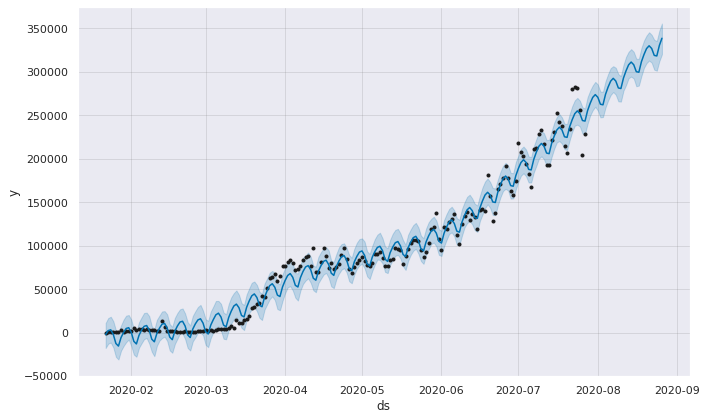

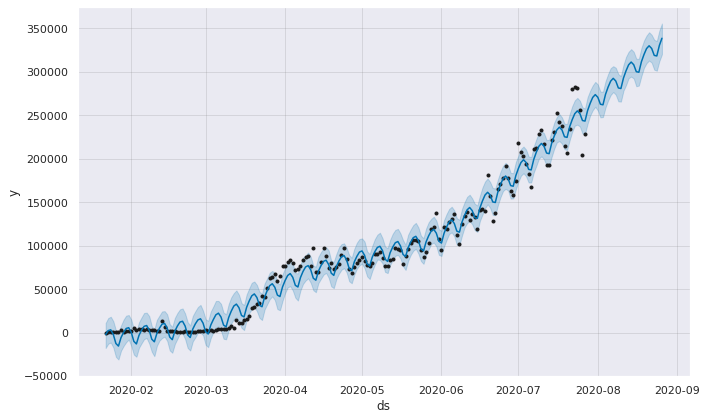

In [ ]:
model.plot(prediction,figsize=(10,6))  # forecasted plot

In [ ]:
newpred=prediction.tail(30)
newpred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
188,2020-07-28,257420.659109,240135.825353,270749.234585,257420.659109,257420.659109,-2114.425902,-2114.425902,-2114.425902,-2114.425902,-2114.425902,-2114.425902,0.0,0.0,0.0,255306.233208
189,2020-07-29,260096.032025,249658.188985,278164.432428,260073.280864,260119.956554,3495.360986,3495.360986,3495.360986,3495.360986,3495.360986,3495.360986,0.0,0.0,0.0,263591.393011
190,2020-07-30,262771.404940,255785.022514,284144.035777,262641.895158,262894.295565,7665.880754,7665.880754,7665.880754,7665.880754,7665.880754,7665.880754,0.0,0.0,0.0,270437.285693
191,2020-07-31,265446.777855,259692.735150,288349.386692,265176.594414,265697.686891,8220.906763,8220.906763,8220.906763,8220.906763,8220.906763,8220.906763,0.0,0.0,0.0,273667.684618
192,2020-08-01,268122.150770,255383.070397,285258.575293,267698.273603,268501.899700,2451.825252,2451.825252,2451.825252,2451.825252,2451.825252,2451.825252,0.0,0.0,0.0,270573.976022
193,2020-08-02,270797.523685,247505.516201,277101.637423,270139.209218,271354.288151,-8186.681341,-8186.681341,-8186.681341,-8186.681341,-8186.681341,-8186.681341,0.0,0.0,0.0,262610.842345
194,2020-08-03,273472.896601,247861.712630,277022.286317,272579.143202,274212.915873,-11532.866512,-11532.866512,-11532.866512,-11532.866512,-11532.866512,-11532.866512,0.0,0.0,0.0,261940.030089
195,2020-08-04,276148.269516,258976.334373,289067.971526,274969.639242,277171.370505,-2114.425902,-2114.425902,-2114.425902,-2114.425902,-2114.425902,-2114.425902,0.0,0.0,0.0,274033.843614
196,2020-08-05,278823.642431,266861.248560,297244.369806,277420.082086,280063.493287,3495.360986,3495.360986,3495.360986,3495.360986,3495.360986,3495.360986,0.0,0.0,0.0,282319.003417
197,2020-08-06,281499.015346,273246.061048,304040.884281,279879.331658,282926.615438,7665.880754,7665.880754,7665.880754,7665.880754,7665.880754,7665.880754,0.0,0.0,0.0,289164.896100


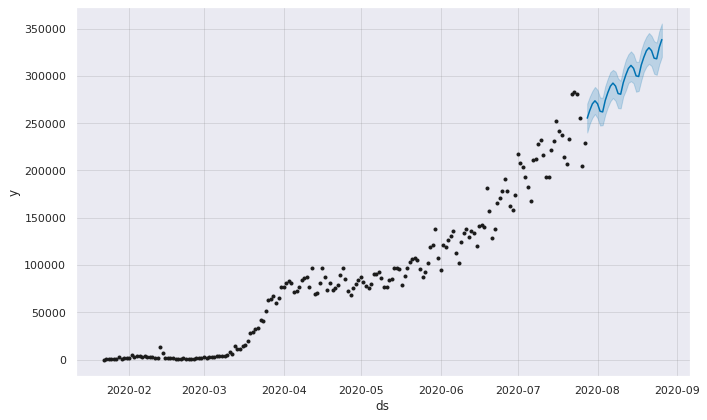

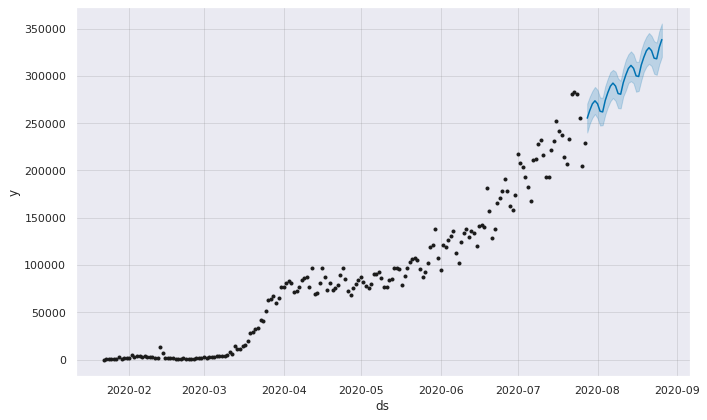

In [ ]:
model.plot(newpred,figsize=(10,6))  # forecasted plot

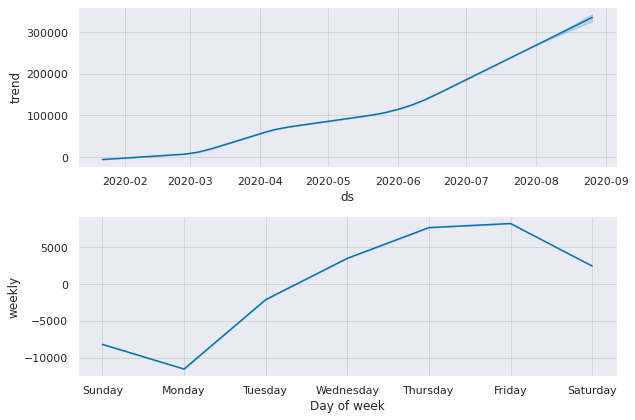

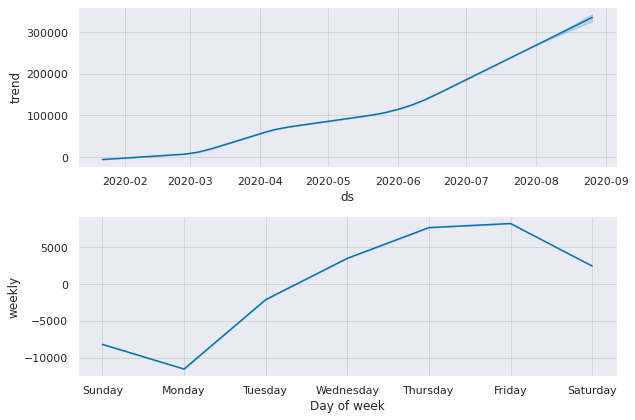

In [ ]:
model.plot_components(prediction) # plottign trends over the course of 30 days

In [ ]:
from fbprophet.diagnostics import cross_validation # checking model performance
model_cross=cross_validation(model,horizon='20 days')

INFO:fbprophet:Making 11 forecasts with cutoffs between 2020-03-29 00:00:00 and 2020-07-07 00:00:00


In [ ]:
from fbprophet.diagnostics import performance_metrics
perform=performance_metrics(model_cross)
perform.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,3.316902e+08,18212.363129,14749.373781,0.134258,0.110472,0.454545
1,3 days,4.262859e+08,20646.692803,17308.211284,0.156109,0.133371,0.318182
2,4 days,4.433420e+08,21055.688403,16331.114397,0.143811,0.115640,0.500000
3,5 days,4.760528e+08,21818.635190,15898.426352,0.144996,0.086211,0.590909
4,6 days,4.348683e+08,20853.496157,16067.169197,0.157480,0.111605,0.500000


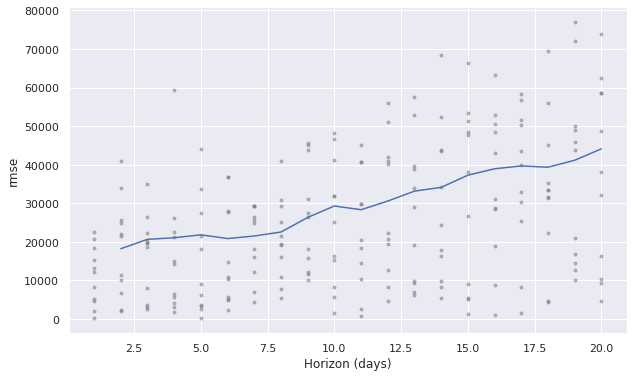

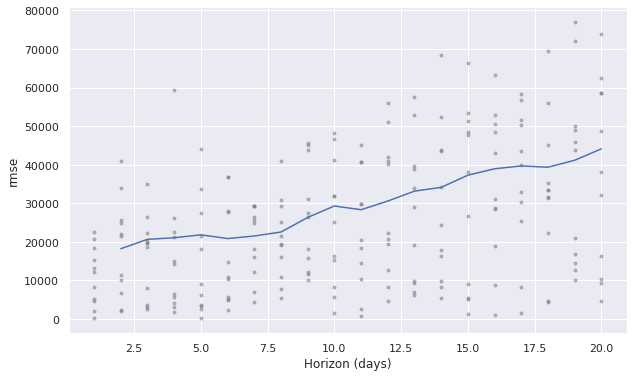

In [ ]:
# visulaizing performance metrics
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(model_cross,metric='rmse')

In [ ]:
next_data=forecast.reindex(index=forecast.index[::-1])  # re arranging dates
next_data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8


In [ ]:
next_data=next_data.drop(['Confirmed','Deaths','New cases','New recovered','Recovered / 100 Cases','Deaths / 100 Recovered','No. of countries'],axis=1) # dropping unessary columns

In [ ]:
next_data=next_data.drop(['Recovered','Active','Deaths / 100 Cases'],axis=1)

In [ ]:
next_data

,Date,New deaths
187,2020-07-27,5415
186,2020-07-26,4104
185,2020-07-25,4867
184,2020-07-24,6144
183,2020-07-23,9966
...,...,...
4,2020-01-26,14
3,2020-01-25,16
2,2020-01-24,8
1,2020-01-23,1


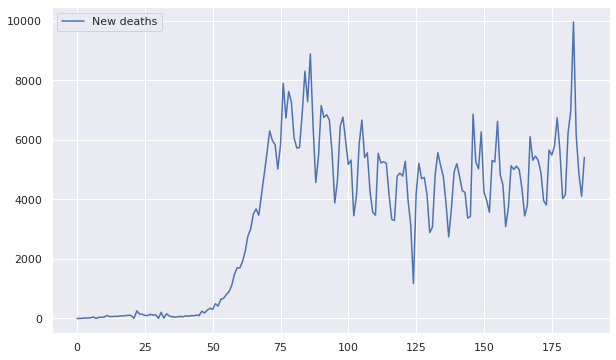

In [ ]:
next_data.plot()# stationary data 

In [ ]:
next_data.columns=['ds','y']# renamming according to convention of fbprophet
next_data

,ds,y
187,2020-07-27,5415
186,2020-07-26,4104
185,2020-07-25,4867
184,2020-07-24,6144
183,2020-07-23,9966
...,...,...
4,2020-01-26,14
3,2020-01-25,16
2,2020-01-24,8
1,2020-01-23,1


In [ ]:
model=Prophet()
 
model.fit(next_data) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [ ]:
future=model.make_future_dataframe(periods=40) # forecsting for next 100 days

In [ ]:
prediction=model.predict(future) # forecasting
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1211.456840,-2383.707762,990.252959,-1211.456840,-1211.456840,487.127201,487.127201,487.127201,487.127201,487.127201,487.127201,0.0,0.0,0.0,-724.329638
1,2020-01-23,-1142.798038,-2170.138259,955.726378,-1142.798038,-1142.798038,547.795859,547.795859,547.795859,547.795859,547.795859,547.795859,0.0,0.0,0.0,-595.002179
2,2020-01-24,-1074.139236,-2400.140122,867.989285,-1074.139236,-1074.139236,400.904795,400.904795,400.904795,400.904795,400.904795,400.904795,0.0,0.0,0.0,-673.234441
3,2020-01-25,-1005.480434,-2762.295571,378.077991,-1005.480434,-1005.480434,-196.356710,-196.356710,-196.356710,-196.356710,-196.356710,-196.356710,0.0,0.0,0.0,-1201.837144
4,2020-01-26,-936.821632,-3578.626409,-208.186181,-936.821632,-936.821632,-906.330535,-906.330535,-906.330535,-906.330535,-906.330535,-906.330535,0.0,0.0,0.0,-1843.152168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-09-01,5297.051335,4061.417631,7372.633402,5099.153953,5490.545987,415.211615,415.211615,415.211615,415.211615,415.211615,415.211615,0.0,0.0,0.0,5712.262950
224,2020-09-02,5300.454009,4127.200309,7478.391637,5094.243558,5502.549920,487.127201,487.127201,487.127201,487.127201,487.127201,487.127201,0.0,0.0,0.0,5787.581210
225,2020-09-03,5303.856683,4224.053759,7360.494235,5086.403333,5516.398903,547.795859,547.795859,547.795859,547.795859,547.795859,547.795859,0.0,0.0,0.0,5851.652541
226,2020-09-04,5307.259357,3985.261078,7332.423515,5082.430677,5530.593799,400.904795,400.904795,400.904795,400.904795,400.904795,400.904795,0.0,0.0,0.0,5708.164152


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
223,2020-09-01,5712.262950,4061.417631,7372.633402
224,2020-09-02,5787.581210,4127.200309,7478.391637
225,2020-09-03,5851.652541,4224.053759,7360.494235
226,2020-09-04,5708.164152,3985.261078,7332.423515
227,2020-09-05,5114.305321,3588.827505,6747.441502


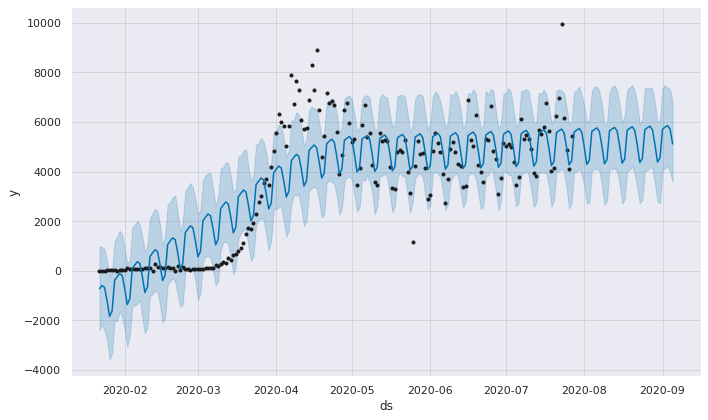

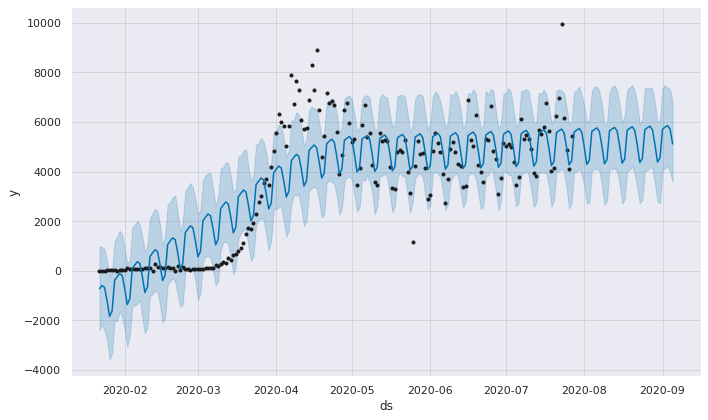

In [ ]:
model.plot(prediction,figsize=(10,6))  # forecasted plot

In [ ]:
nextpred=prediction.tail(30)
nextpred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
198,2020-08-07,5211.984486,4018.559726,7206.293026,5184.991909,5243.186600,400.904795,400.904795,400.904795,400.904795,400.904795,400.904795,0.0,0.0,0.0,5612.889281
199,2020-08-08,5215.387160,3427.885853,6686.014759,5184.688146,5251.352340,-196.356710,-196.356710,-196.356710,-196.356710,-196.356710,-196.356710,0.0,0.0,0.0,5019.030450
200,2020-08-09,5218.789834,2641.374845,5893.613982,5183.125989,5260.009646,-906.330535,-906.330535,-906.330535,-906.330535,-906.330535,-906.330535,0.0,0.0,0.0,4312.459298
201,2020-08-10,5222.192508,2809.773339,5944.776181,5181.127771,5268.362823,-748.352225,-748.352225,-748.352225,-748.352225,-748.352225,-748.352225,0.0,0.0,0.0,4473.840283
202,2020-08-11,5225.595182,4088.187714,7198.677400,5177.869193,5277.417481,415.211615,415.211615,415.211615,415.211615,415.211615,415.211615,0.0,0.0,0.0,5640.806797
203,2020-08-12,5228.997856,4086.775349,7404.492320,5176.158287,5286.840339,487.127201,487.127201,487.127201,487.127201,487.127201,487.127201,0.0,0.0,0.0,5716.125057
204,2020-08-13,5232.400530,4133.749822,7464.231918,5172.202497,5295.516821,547.795859,547.795859,547.795859,547.795859,547.795859,547.795859,0.0,0.0,0.0,5780.196388
205,2020-08-14,5235.803203,4000.062173,7242.006918,5169.519187,5304.516864,400.904795,400.904795,400.904795,400.904795,400.904795,400.904795,0.0,0.0,0.0,5636.707999
206,2020-08-15,5239.205877,3492.472594,6693.967958,5166.205784,5313.302657,-196.356710,-196.356710,-196.356710,-196.356710,-196.356710,-196.356710,0.0,0.0,0.0,5042.849167
207,2020-08-16,5242.608551,2702.824198,5955.249764,5163.579635,5323.253688,-906.330535,-906.330535,-906.330535,-906.330535,-906.330535,-906.330535,0.0,0.0,0.0,4336.278016


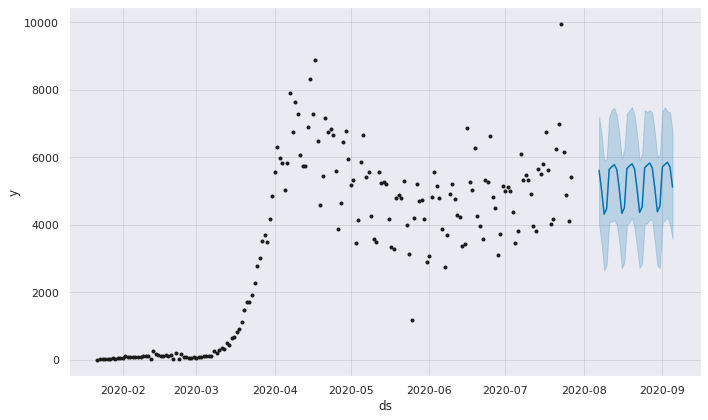

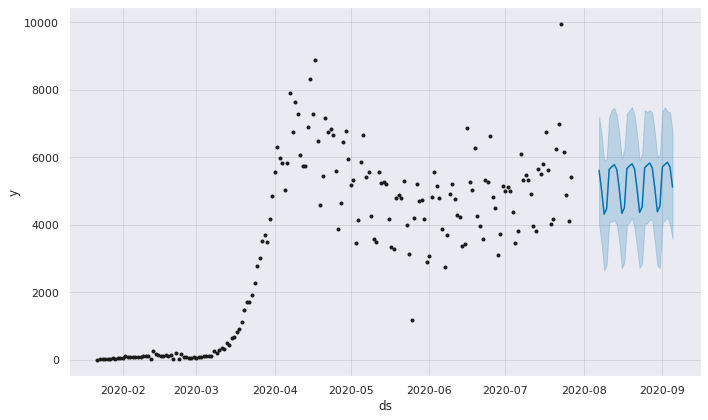

In [ ]:
model.plot(nextpred,figsize=(10,6))  # forecasted plot

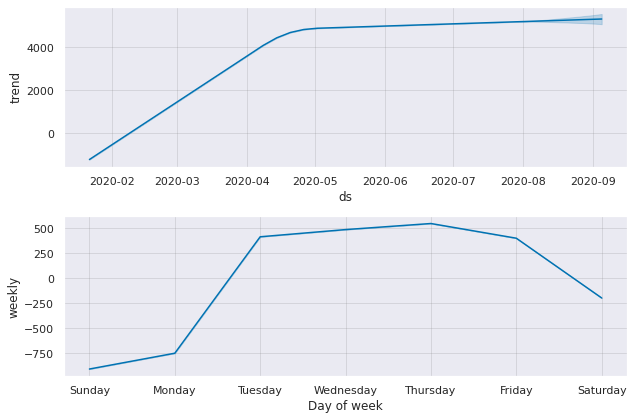

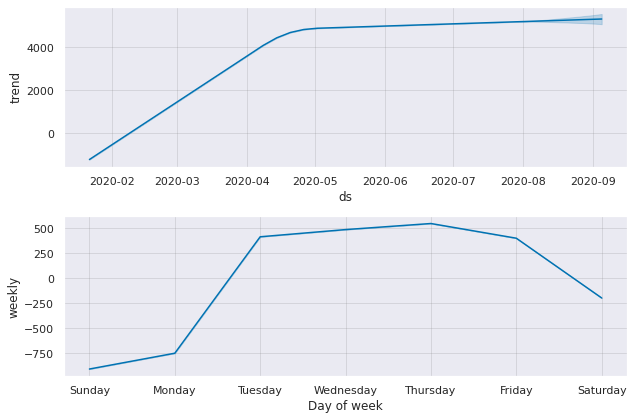

In [ ]:
model.plot_components(prediction) 

In [ ]:
from fbprophet.diagnostics import cross_validation # checking model performance
model_cross=cross_validation(model,horizon='20 days')

INFO:fbprophet:Making 11 forecasts with cutoffs between 2020-03-29 00:00:00 and 2020-07-07 00:00:00


In [ ]:
from fbprophet.diagnostics import performance_metrics
perform=performance_metrics(model_cross)
perform.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,3.767652e+06,1941.044173,1557.766604,0.337781,0.323505,0.545455
1,3 days,4.536005e+06,2129.789949,1717.891722,0.374507,0.318503,0.409091
2,4 days,4.968545e+06,2229.023252,1781.082551,0.373710,0.354274,0.363636
3,5 days,5.467489e+06,2338.266212,1894.548827,0.385496,0.366241,0.409091
4,6 days,5.769279e+06,2401.932402,1944.642898,0.406425,0.389795,0.454545


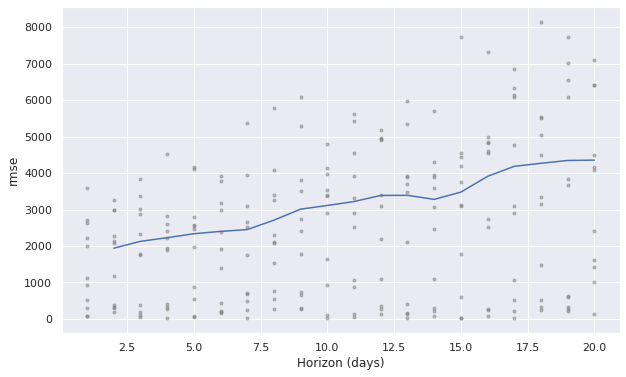

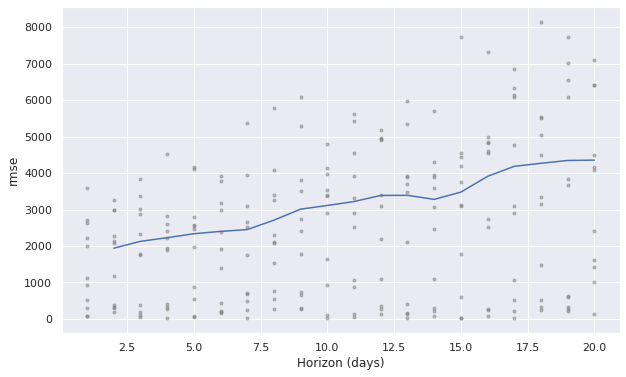

In [ ]:
# visulaizing performance metrics
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(model_cross,metric='rmse')